### Project 3 - IE6400 Foundations of Data Analytics - Group 8

Team members:

Jaamie Maarsh Joy Martin
joymartin.j@northeastern.edu
+1 (206)-356-0024

Wenbo Zhu
zhu.wenbo@northeastern.edu
+1 (678)-873-3680

Kalyan Kumar Chenchu Malakondaiah
chenchumalakondaia.k@northeastern.edu
+1 (206)-679-0953


In [27]:
pip install pandas nltk matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [51]:
import pandas as pd
import nltk
import seaborn as sns
import plotly.express as px
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer




In [29]:
# reading the required datasets

# loading/reading of the datasets into the workspace location
df_tweet_2017= pd.read_csv('/Users/jaamiemaarshj/Desktop/  DAE Course Materials/Fundamentals of Data Analytics/Project 3/2017.csv', low_memory=False)

df_tweet_2018= pd.read_csv('/Users/jaamiemaarshj/Desktop/  DAE Course Materials/Fundamentals of Data Analytics/Project 3/2018.csv', low_memory=False)

df_tweet_2019= pd.read_csv('/Users/jaamiemaarshj/Desktop/  DAE Course Materials/Fundamentals of Data Analytics/Project 3/2019.csv', low_memory=False)

df_tweet_2020= pd.read_csv('/Users/jaamiemaarshj/Desktop/  DAE Course Materials/Fundamentals of Data Analytics/Project 3/2020.csv', low_memory=False)

df_tweet_2021= pd.read_csv('/Users/jaamiemaarshj/Desktop/  DAE Course Materials/Fundamentals of Data Analytics/Project 3/2021.csv', low_memory=False)



In [30]:
# merging all the datasets into one
merged_tweets_df = pd.concat([df_tweet_2017, df_tweet_2018, df_tweet_2019, df_tweet_2020, df_tweet_2021])
display(merged_tweets_df.head())
merged_tweets_df.shape

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,reply_to,retweet_date,translate,trans_src,trans_dest,time,mentions,replies_count,retweets_count,likes_count
0,0.0,945814723521417217,945712432416137217,1514334777000.0,2017-12-27 00:32:57,0,NaN,@neilsiegel @Tesla Coming very soon,en,[],...,"[{'screen_name': 'neilsiegel', 'name': 'Neil S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,945749747129659392,945712432416137217,1514319285000.0,2017-12-26 20:14:45,0,NaN,@Kreative Vastly better maps/nav coming soon,en,[],...,"[{'screen_name': 'Kreative', 'name': 'Leslie',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,945748731197980672,945712432416137217,1514319043000.0,2017-12-26 20:10:43,0,NaN,@dd_hogan Ok,und,[],...,"[{'screen_name': 'dd_hogan', 'name': 'Live4EVD...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,945730195113365504,945727773493968896,1514314623000.0,2017-12-26 18:57:03,0,NaN,@Jason @Tesla Sure,en,[],...,"[{'screen_name': 'Jason', 'name': 'jason@calac...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,945729852874694656,945712432416137217,1514314542000.0,2017-12-26 18:55:42,0,NaN,"@kabirakhtar Yeah, it’s terrible. Had to upgra...",en,[],...,"[{'screen_name': 'kabirakhtar', 'name': 'kabir...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(28596, 44)

In [31]:
#Checking the datatype of all the necessary fields
merged_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28596 entries, 0 to 3114
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       25481 non-null  float64
 1   id               28596 non-null  int64  
 2   conversation_id  28596 non-null  int64  
 3   created_at       28596 non-null  object 
 4   date             28596 non-null  object 
 5   timezone         28596 non-null  int64  
 6   place            0 non-null      float64
 7   tweet            28596 non-null  object 
 8   language         28596 non-null  object 
 9   hashtags         28596 non-null  object 
 10  cashtags         28596 non-null  object 
 11  user_id          28596 non-null  int64  
 12  user_id_str      25481 non-null  float64
 13  username         28596 non-null  object 
 14  name             28596 non-null  object 
 15  day              25481 non-null  float64
 16  hour             25481 non-null  float64
 17  link         

In [32]:
#Taking a backup of all the dataset and working with it
merged_tweets_df_copy = merged_tweets_df.copy()

#dropping the unnecessary columns
columns_to_drop = ['place', 'thumbnail', 'quote_url', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'time', 'mentions', 'replies_count', 'retweets_count', 'likes_count' ]
merged_tweets_df_copy = merged_tweets_df_copy.drop(columns=columns_to_drop)
merged_tweets_df_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 28596 entries, 0 to 3114
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       25481 non-null  float64
 1   id               28596 non-null  int64  
 2   conversation_id  28596 non-null  int64  
 3   created_at       28596 non-null  object 
 4   date             28596 non-null  object 
 5   timezone         28596 non-null  int64  
 6   tweet            28596 non-null  object 
 7   language         28596 non-null  object 
 8   hashtags         28596 non-null  object 
 9   cashtags         28596 non-null  object 
 10  user_id          28596 non-null  int64  
 11  user_id_str      25481 non-null  float64
 12  username         28596 non-null  object 
 13  name             28596 non-null  object 
 14  day              25481 non-null  float64
 15  hour             25481 non-null  float64
 16  link             28596 non-null  object 
 17  urls         

In [33]:
#computing the year column from the date columns
merged_tweets_df_copy['date'] = pd.to_datetime(merged_tweets_df_copy['date'])
#Cross sorting the data and making sure the data is between 2017 & 2021
merged_tweets_df_copy = merged_tweets_df_copy[merged_tweets_df_copy['date'].dt.year.between(2017, 2021)]


#### Task 1: Compute the term frequencies for each year. They should be normalized (scale of [0, 1]). Exclude stopwords

In [63]:
# Assuming 'tweet' is the column containing text data
text_data = merged_tweets_df_copy['tweet'].astype(str)

# Grouping the tweets by year
grouped_data = merged_tweets_df_copy.groupby(merged_tweets_df_copy['date'].dt.year)

# Tokenization and stopwords removal for each year
stop_words = set(stopwords.words('english'))
yearly_tokenized_data = {}

#tokenizing the text data for each year and storing it in a library
for year, year_group in grouped_data:
    text_for_year = year_group['tweet'].astype(str)
    tokenized_data = [word.lower() for text in text_for_year for word in nltk.word_tokenize(text) if word.isalnum() and word.lower() not in stop_words]
    yearly_tokenized_data[year] = tokenized_data

# Counting of term frequencies for each year
term_frequencies = {year: Counter(tokens) for year, tokens in yearly_tokenized_data.items()}

# Normalizing the term frequencies within [0, 1] for each year as per the question
scaler = MinMaxScaler()
normalized_frequencies = {year: {term: freq/sum(term_frequencies[year].values()) for term, freq in term_freq.items()} for year, term_freq in term_frequencies.items()}

# Displaying output
for year, frequencies in normalized_frequencies.items():
    print(f"Term frequencies for the Year {year}:")
    print(f"-------------------------------------")
    for term, freq in frequencies.items():
        print(f"{term}: {freq:.4f}")
    print()


Term frequencies for the Year 2017:
-------------------------------------
neilsiegel: 0.0001
tesla: 0.0083
coming: 0.0027
soon: 0.0033
kreative: 0.0001
vastly: 0.0004
better: 0.0026
ok: 0.0011
jason: 0.0001
sure: 0.0025
kabirakhtar: 0.0001
yeah: 0.0040
terrible: 0.0003
upgrade: 0.0003
old: 0.0004
linux: 0.0003
os: 0.0002
bunch: 0.0001
drivers: 0.0001
first: 0.0044
major: 0.0007
browser: 0.0006
upgrades: 0.0002
cars: 0.0031
months: 0.0015
note: 0.0003
slower: 0.0001
code: 0.0001
optimized: 0.0001
sustainableanna: 0.0001
vanseedbank: 0.0002
similar: 0.0003
total: 0.0002
size: 0.0003
maybe: 0.0027
slightly: 0.0005
bigger: 0.0004
account: 0.0002
really: 0.0028
gamechanging: 0.0001
think: 0.0019
feature: 0.0004
like: 0.0051
add: 0.0010
iamsamcrompton: 0.0001
sustainable: 0.0001
energy: 0.0007
production: 0.0024
solar: 0.0008
batteries: 0.0005
grow: 0.0001
much: 0.0030
faster: 0.0007
auto: 0.0006
percentage: 0.0001
basis: 0.0001
big: 0.0010
focus: 0.0002
next: 0.0042
year: 0.0027
primary: 0.

#### Task 2: Show the top 10 words (for each year) by highest value of word frequency

In [35]:
# Displaying the top 10 words for each year based on the number of occurance
for year, frequencies in term_frequencies.items():
    top_words = dict(sorted(frequencies.items(), key=lambda item: item[1], reverse=True)[:10])
    print(f"\nTop 10 words for Year {year}:")
    for word, freq in top_words.items():
        print(f"{word}: {freq}")


Top 10 words for Year 2017:
https: 699
amp: 267
tesla: 240
model: 177
yes: 162
good: 159
spacex: 156
like: 147
one: 138
first: 126

Top 10 words for Year 2018:
amp: 1581
tesla: 1354
https: 971
car: 360
yes: 324
3: 315
good: 305
model: 294
like: 282
spacex: 264

Top 10 words for Year 2019:
tesla: 1130
amp: 970
https: 744
erdayastronaut: 520
spacex: 429
flcnhvy: 364
yes: 307
would: 198
great: 193
teslaownerssv: 182

Top 10 words for Year 2020:
amp: 578
https: 359
tesla: 347
erdayastronaut: 247
flcnhvy: 239
ppathole: 225
spacex: 207
yes: 160
great: 128
thirdrowtesla: 123

Top 10 words for Year 2021:
amp: 476
tesla: 327
https: 320
spacex: 237
wholemarsblog: 189
teslaownerssv: 119
ppathole: 116
erdayastronaut: 111
great: 102
good: 98


#### Task 3: Plot a histogram of word frequencies for each year

##### We have plotted  2 histograms for the question where the first one is based on the number of times the word occurs in tweets and the second one is plotting the term frequencies (which is the number of times the word has occured divided by the total number of words)

/var/folders/0c/6l7fjjk134q20fw6s25nlr4h0000gn/T/ipykernel_5300/3631912653.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



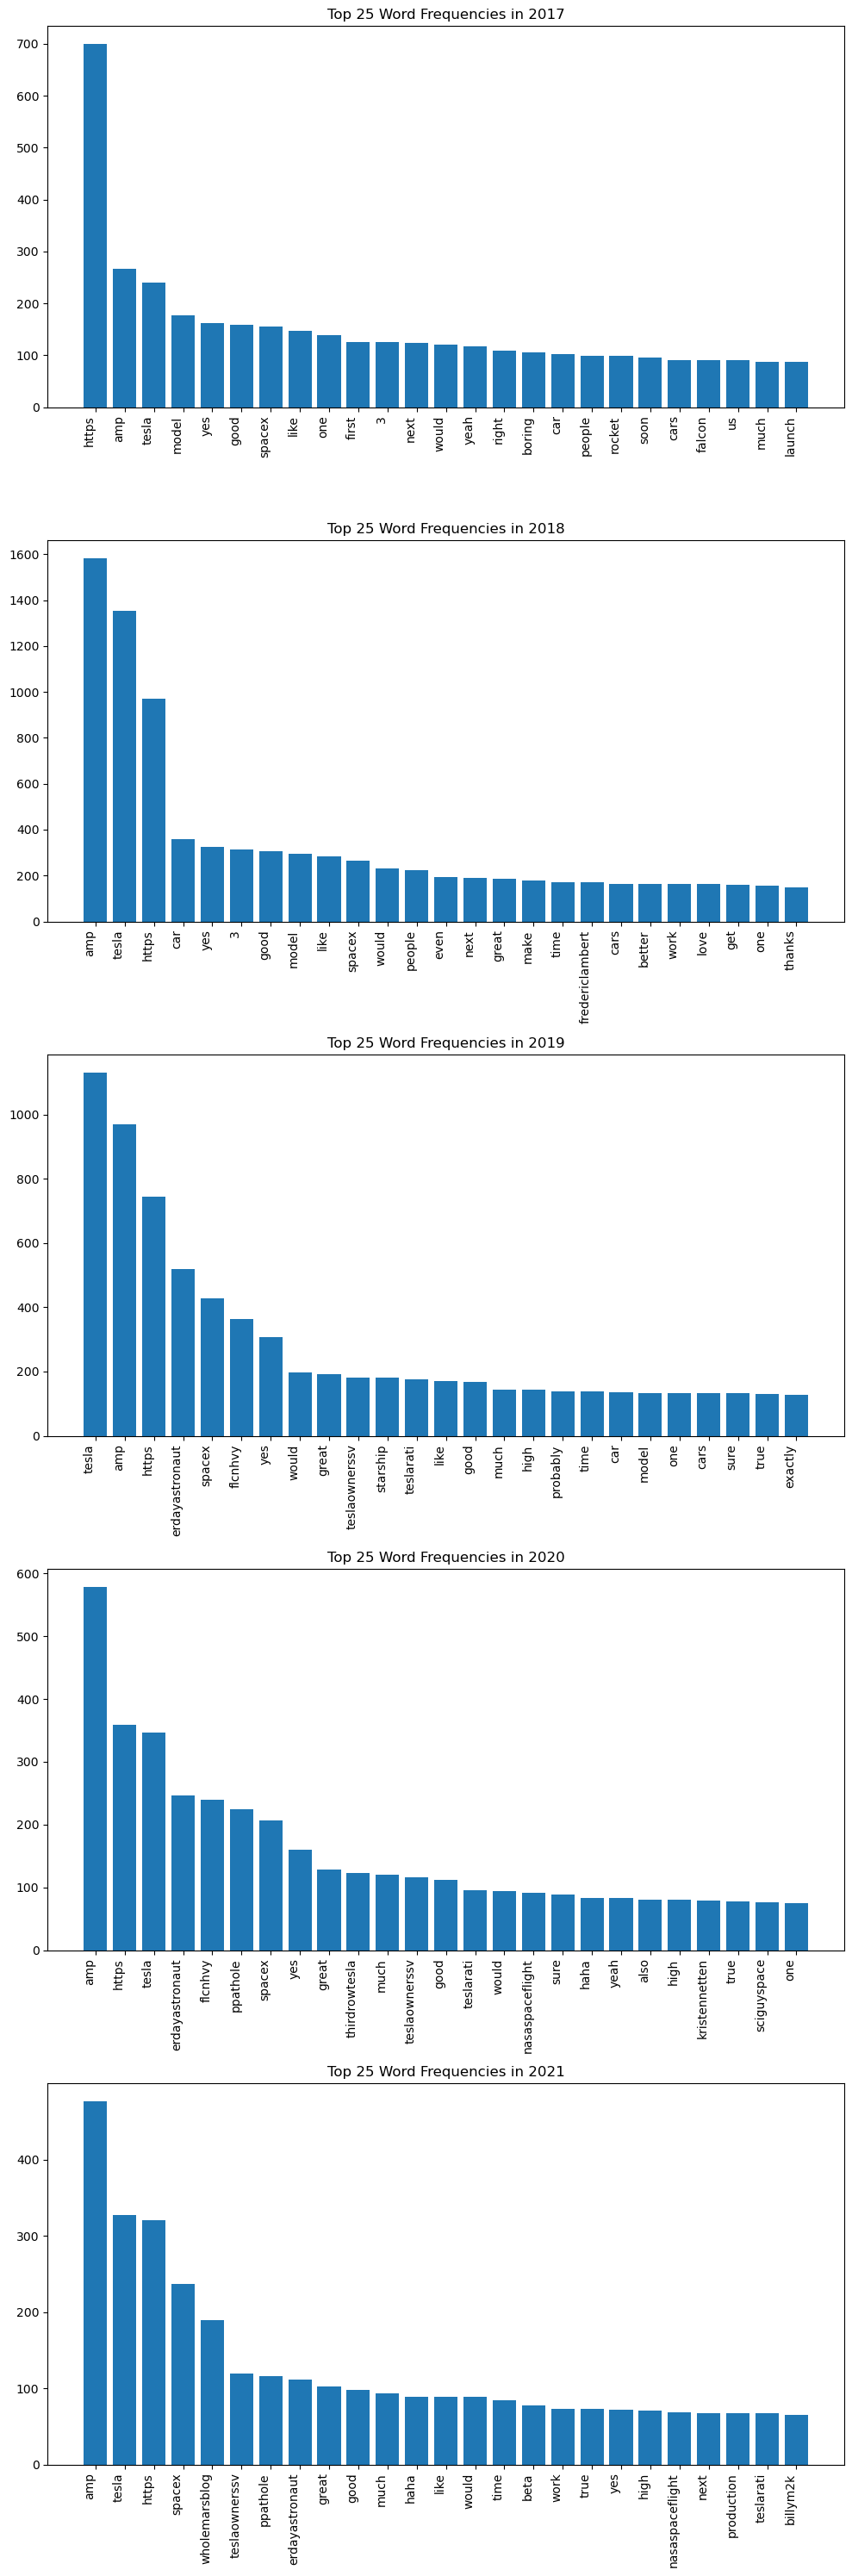

In [57]:

# Plotting a histogram of word frequencies for each year

# we are plotting the 10 most frequent word for the asthetic and clear understanding purpose
fig, axs = plt.subplots(len(term_frequencies), 1, figsize=(10, 6 * len(term_frequencies)))

for i, (year, frequencies) in enumerate(term_frequencies.items()):
    top_words = dict(sorted(frequencies.items(), key=lambda item: item[1], reverse=True)[:25])
    axs[i].bar(top_words.keys(), top_words.values())
    axs[i].set_title(f"Top 25 Word Frequencies in {year}")
    
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90, ha='right')


# Adjust layout for better spacing
plt.tight_layout()
plt.show()


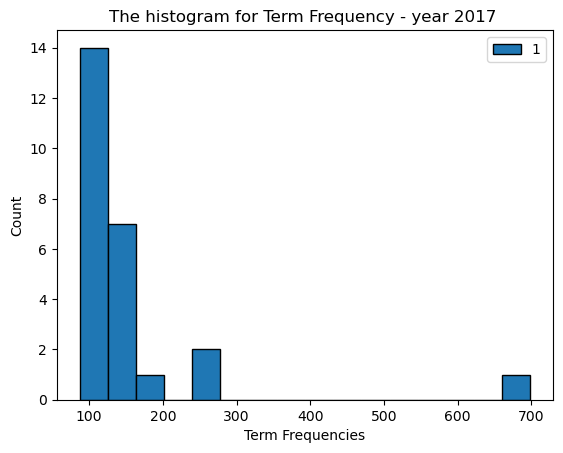

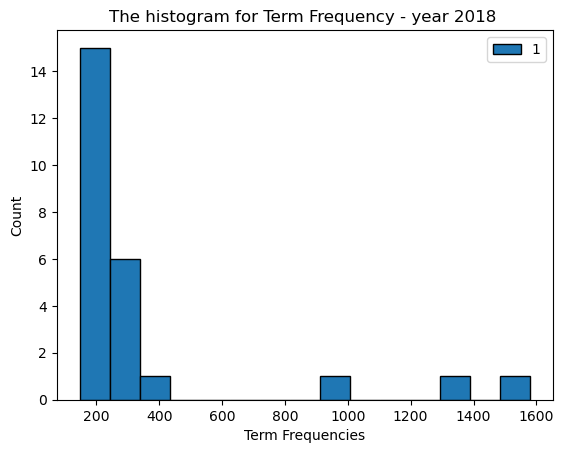

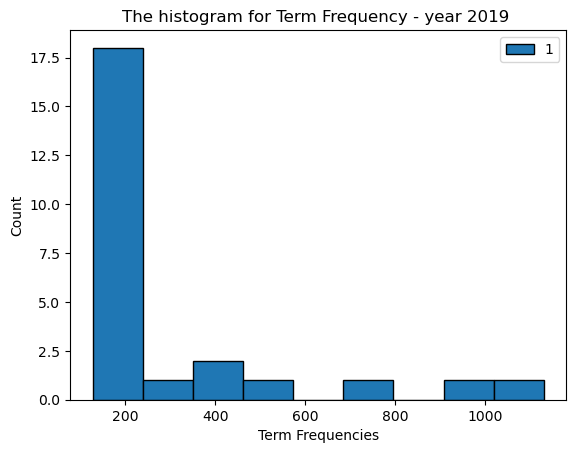

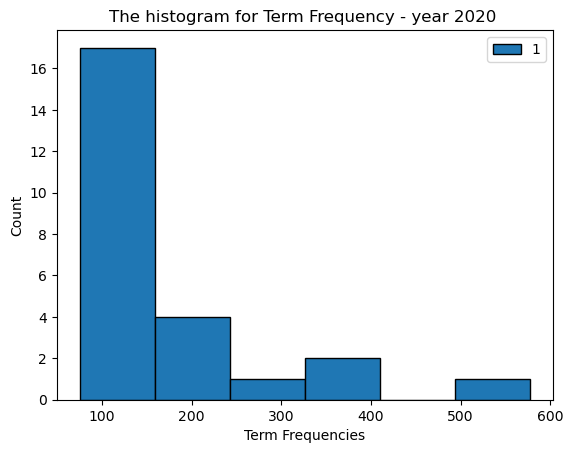

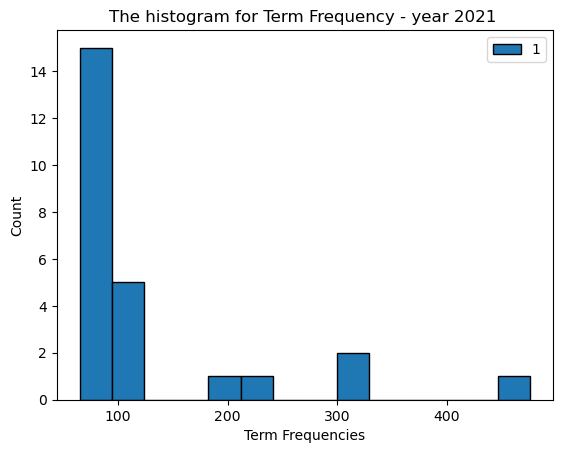

In [60]:
#plotting the term frequencies:

#Will be shpwing the histogram of word frequencies for the top 25 words
#Reusing the terms from task 2
for year,frequencies in term_frequencies.items():
     #Sorting the dictionary descendingly in terms of term frequencies. The sorted () function converts it into a list.
     freq_sort=sorted(frequencies.items(), key = lambda x : x[1], reverse = True)
     freq_top_25 = freq_sort[:25]

     for word,freq in freq_top_25:
          pass
     #Converting the list into a DataFrame
     hist_df= pd.DataFrame(freq_top_25)
     #Renaming the columns
     hist_df.rename(columns = {0:'Words',1:'Term Frequency'})
     #Plotting the graphs
     sns.histplot(data=hist_df,alpha=1)
     #Renaming axes labels accordingly
     plt.xlabel('Term Frequencies')
     #sample.hist()
     #fig = px.histogram(sample, x=1,nbins=10)
     plt.title(f'The histogram for Term Frequency - year {year} ')
     plt.show()
   

#### Task 4:  Demonstrate Zipf’s law by plotting log-log plots of word frequencies v. rank for each year

In [53]:

# Creating log-log plots for each year using Plotly ('for' loop)
for year, frequencies in term_frequencies.items():
    sorted_freq = sorted(frequencies.values(), reverse=True)
    ranks = np.arange(1, len(sorted_freq) + 1)
   

    # Generating log-log plots for each year
    fig = px.scatter(#x=list(ranks.values()), y=list(term_frequencies[year].values()),
        x=ranks, y=sorted_freq,
                     labels={'x': 'Log(Rank)', 'y': 'Log(Word Frequency)'},
                     title=f"Zipf's Law: Log-Log Plot for Year {year}",
                     template='plotly_white',
                     )
    fig.update_layout(
    xaxis_type='log',
    yaxis_type='log',
    
)
 
    fig.show()




#### Task 5: Use TF-IDF to calculate and show the 5 most “important” words for each year

In [55]:
#concatenate all the tweets for each year into a single string and then tokenize that string
for year, year_group in merged_tweets_df_copy.groupby(merged_tweets_df_copy['date'].dt.year):
    text_for_year = ' '.join(year_group['tweet'].astype(str))
    tokenized_data = [word.lower() for word in nltk.word_tokenize(text_for_year) if word.isalnum() and word.lower() not in stop_words]
    yearly_tokenized_data[year] = ' '.join(tokenized_data)

# Calculate TF-IDF for each year
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(yearly_tokenized_data.values())
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the top 5 important words for each year
for i, (year, tfidf_scores) in enumerate(zip(yearly_tokenized_data.keys(), tfidf_matrix)):
    top_indices = tfidf_scores.indices[tfidf_scores.data.argsort()[-5:][::-1]]
    top_words = [feature_names[idx] for idx in top_indices]
    print(f"\nTop 5 important words for Year {year}:")
    print(top_words)


Top 5 important words for Year 2017:
['https', 'amp', 'tesla', 'model', 'yes']

Top 5 important words for Year 2018:
['amp', 'tesla', 'https', 'car', 'yes']

Top 5 important words for Year 2019:
['tesla', 'amp', 'https', 'erdayastronaut', 'flcnhvy']

Top 5 important words for Year 2020:
['amp', 'https', 'tesla', 'flcnhvy', 'erdayastronaut']

Top 5 important words for Year 2021:
['amp', 'tesla', 'wholemarsblog', 'https', 'spacex']
